# Day 08. Exercise 01
# Binary classifier. SVM. Decision tree

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

## 1. Preprocessing and logreg visualization

Read the file `am_pm.csv` to a dataframe from the previous exercise.

1. Draw a plot where the x-axis is `am`, the y-axis is `pm`, dots are the days, color depends on the target.
2. Add the decision boundary of logistic regression to the plot.
3. Draw the same plot (with the boundary), but the color should depend this time on the predictions.

Now it should be clear for you how the logistic regression works.

In [2]:
df = pd.read_csv('../data/am_pm.csv')

In [3]:
# Преобразование столбца target в числовые значения
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['target'])

# Разделение данных
X = df[['am', 'pm']]
y = df['target']

# Обучение логистической регрессии
model = LogisticRegression(random_state=42)
model.fit(X, y)

LogisticRegression(random_state=42)

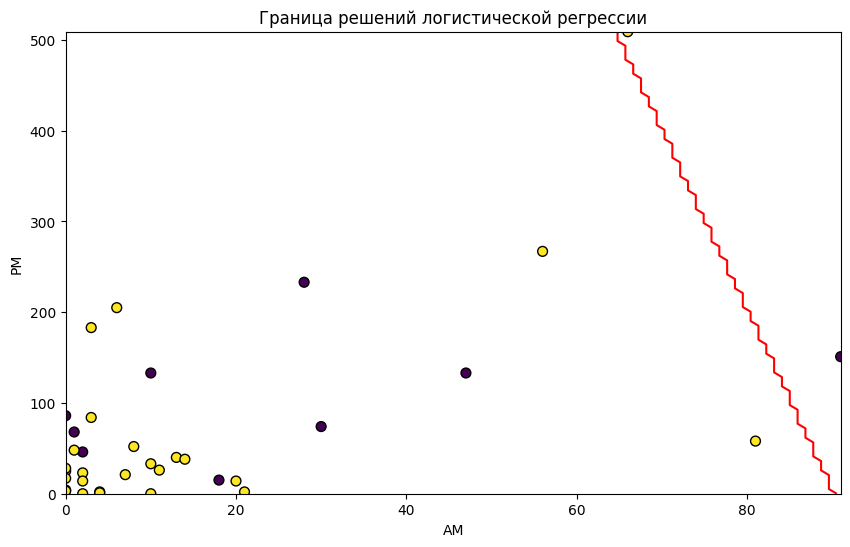

In [4]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(df['am'], df['pm'], c=df['target'], cmap='viridis', edgecolor='k', s=50)
plt.title('Граница решений логистической регрессии')
plt.xlabel('AM')
plt.ylabel('PM')

# Построение границы решений
xx, yy = np.meshgrid(np.linspace(df['am'].min(), df['am'].max(), 100),
                     np.linspace(df['pm'].min(), df['pm'].max(), 100))
Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['am', 'pm']))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.show()

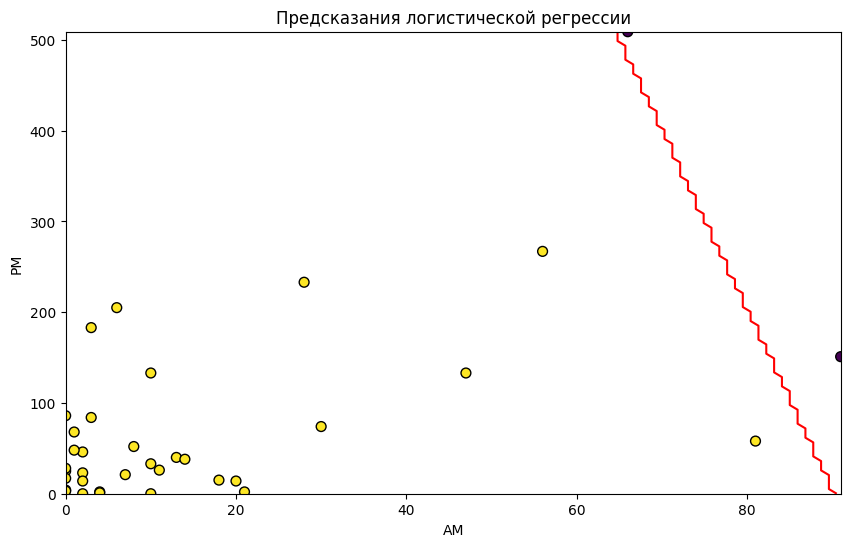

In [5]:
# Предсказание с использованием модели
y_pred = model.predict(X)

# Построение графика с предсказаниями
plt.figure(figsize=(10, 6))
plt.scatter(df['am'], df['pm'], c=y_pred, cmap='viridis', edgecolor='k', s=50)
plt.title('Предсказания логистической регрессии')
plt.xlabel('AM')
plt.ylabel('PM')

# Построение границы решений
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.show()

## 2. Standardizing and logreg

Linear models can be sensitive to the scale of your variables. You make it easier for them to find the optimal solution when you scale your features.

1. Apply `StandardScaler` to `X` and train logistic regression again with the same parameters.
2. Calculate `accuracy` for the new model. Did it get better than a naive classifier with the most popular class?
3. Draw the plots that were described above but for the new model.

In [6]:
# Применение StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=['am', 'pm'])

# Обучение логистической регрессии на масштабированных данных
model_scaled = LogisticRegression(random_state=42)
model_scaled.fit(X_scaled, y)

LogisticRegression(random_state=42)

In [7]:
# Вычисление точности
accuracy = model_scaled.score(X_scaled, y)
print(f'Точность: {accuracy}')

Точность: 0.7142857142857143


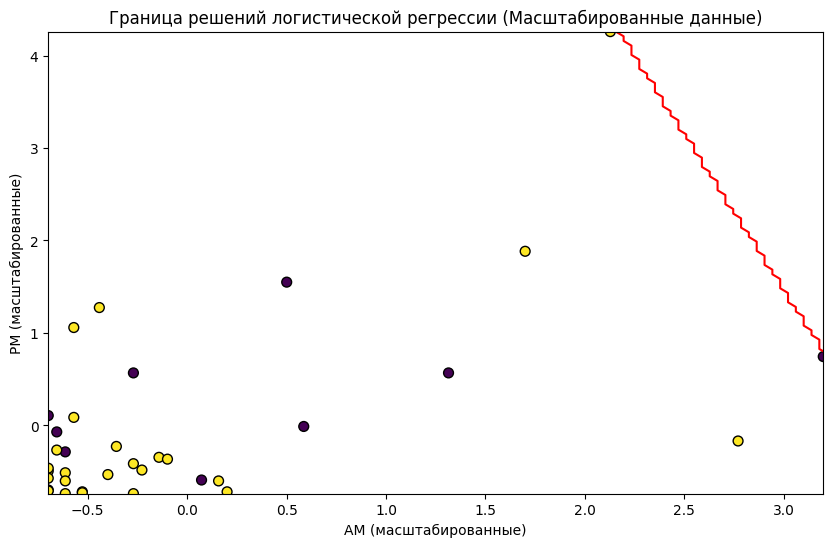

In [8]:
# Построение графика с масштабированными данными
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['am'], X_scaled['pm'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Граница решений логистической регрессии (Масштабированные данные)')
plt.xlabel('AM (масштабированные)')
plt.ylabel('PM (масштабированные)')

# Построение границы решений
xx, yy = np.meshgrid(np.linspace(X_scaled['am'].min(), X_scaled['am'].max(), 100),
                     np.linspace(X_scaled['pm'].min(), X_scaled['pm'].max(), 100))
Z = model_scaled.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['am', 'pm']))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.show()

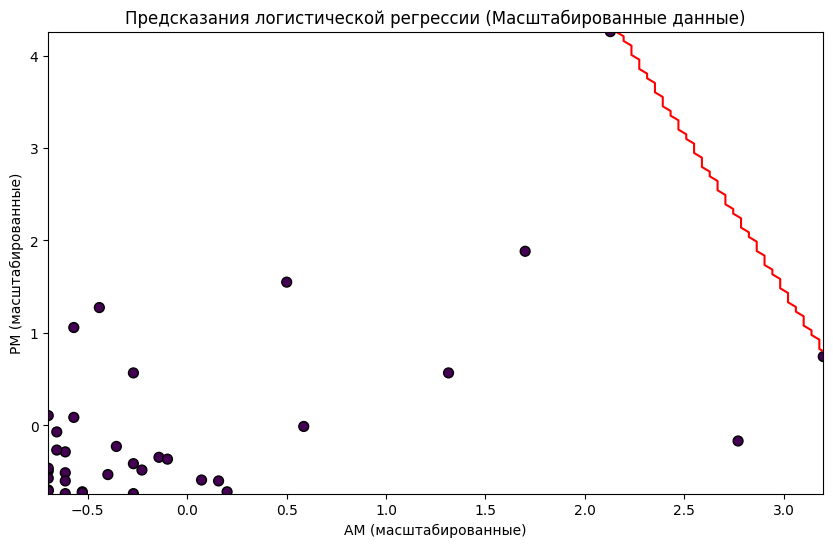

In [9]:
# Предсказание с использованием модели
y_pred_scaled = model_scaled.predict(X_scaled)

# Построение графика с предсказаниями
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['am'], X_scaled['pm'], c=y_pred_scaled, cmap='viridis', edgecolor='k', s=50)
plt.title('Предсказания логистической регрессии (Масштабированные данные)')
plt.xlabel('AM (масштабированные)')
plt.ylabel('PM (масштабированные)')

# Построение границы решений
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.show()

## 3. SVM

1. Apply `SVC` model to the scaled dataframe using parameters `probability=True`, `random_state=21`.
2. Calculate `accuracy`.
3. Try different kernels, find the best in terms of accuracy.
4. Draw both plots again with the decisions boundary to see how this algorithm works.

In [10]:
# Обучение модели SVC
svc_model = SVC(probability=True, random_state=21)
svc_model.fit(X_scaled, y)

SVC(probability=True, random_state=21)

In [11]:
# Вычисление точности
accuracy_svc = svc_model.score(X_scaled, y)
print(f'Точность SVC: {accuracy_svc}')

Точность SVC: 0.7428571428571429


In [12]:
# Попробуем разные ядра
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_kernel = None
best_accuracy = 0

for kernel in kernels:
    svc_model = SVC(kernel=kernel, probability=True, random_state=21)
    svc_model.fit(X_scaled, y)
    accuracy = svc_model.score(X_scaled, y)
    print(f'Ядро: {kernel}, Точность: {accuracy}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f'Лучшее ядро: {best_kernel}, Лучшая точность: {best_accuracy}')

Ядро: linear, Точность: 0.7142857142857143
Ядро: poly, Точность: 0.7428571428571429
Ядро: rbf, Точность: 0.7428571428571429
Ядро: sigmoid, Точность: 0.6857142857142857
Лучшее ядро: poly, Лучшая точность: 0.7428571428571429


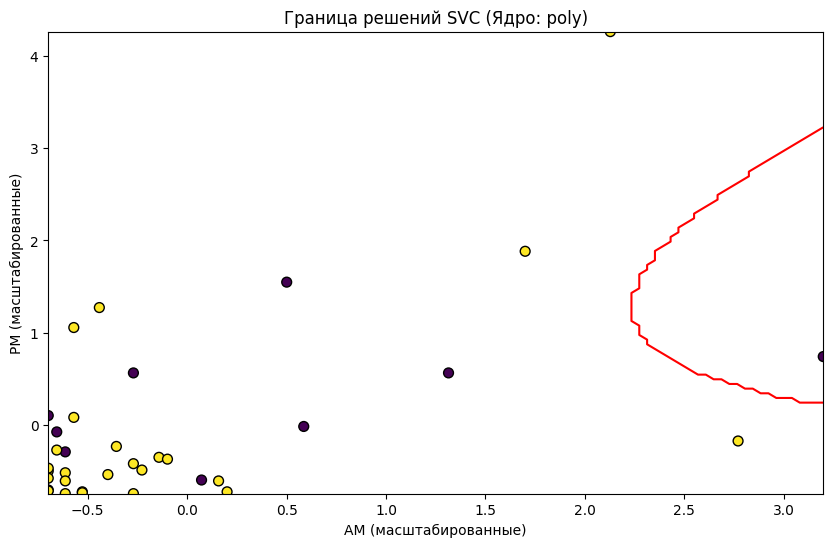

In [13]:
# Обучение лучшей модели SVC
best_svc_model = SVC(kernel=best_kernel, probability=True, random_state=21)
best_svc_model.fit(X_scaled, y)

# Построение графика с масштабированными данными
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['am'], X_scaled['pm'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title(f'Граница решений SVC (Ядро: {best_kernel})')
plt.xlabel('AM (масштабированные)')
plt.ylabel('PM (масштабированные)')

# Построение границы решений
xx, yy = np.meshgrid(np.linspace(X_scaled['am'].min(), X_scaled['am'].max(), 100),
                     np.linspace(X_scaled['pm'].min(), X_scaled['pm'].max(), 100))
Z = best_svc_model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['am', 'pm']))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.show()

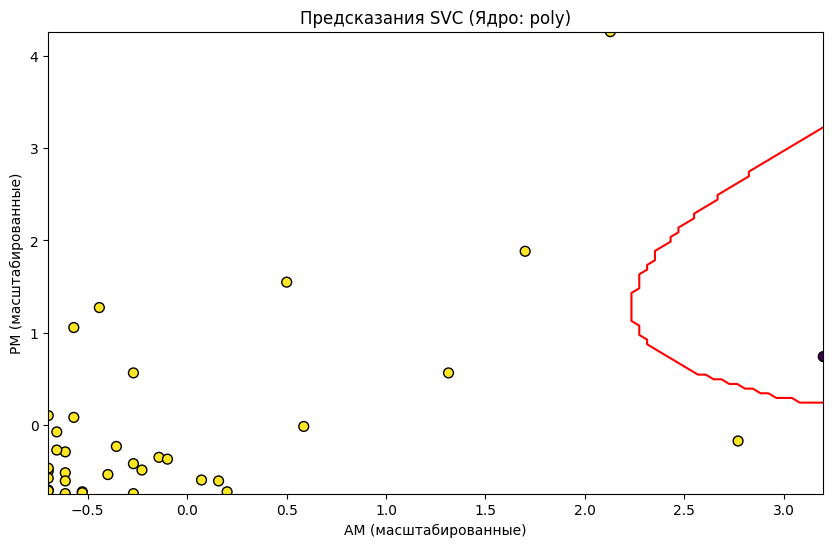

In [14]:
# Предсказание с использованием модели
y_pred_svc = best_svc_model.predict(X_scaled)

# Построение графика с предсказаниями
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['am'], X_scaled['pm'], c=y_pred_svc, cmap='viridis', edgecolor='k', s=50)
plt.title(f'Предсказания SVC (Ядро: {best_kernel})')
plt.xlabel('AM (масштабированные)')
plt.ylabel('PM (масштабированные)')

# Построение границы решений
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.show()

## 4. Decision tree

1. Apply `DecisionTreeClassifier` to the scaled dataframe using parameters `max_depth=4`, `random_state=42`.
2. Calculate accuracy.
3. Try different values of `max_depth`.
4. Draw both plots again with the decisions boundary to see how this algorithm works.
5. Using method `.plot_tree()` visualize the decision tree itself. It is another way of thinking about how the algorithm works.
6. How many leaves in the visualized tree label days as working days? Put your answer in the markdown cell in the end of the section.

In [15]:
# Обучение модели DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_scaled, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [16]:
# Вычисление точности
accuracy_tree = tree_model.score(X_scaled, y)
print(f'Точность Decision Tree: {accuracy_tree}')

Точность Decision Tree: 0.9428571428571428


In [17]:
# Попробуем разные значения max_depth
depths = range(1, 11)
best_depth = None
best_accuracy_tree = 0

for depth in depths:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_model.fit(X_scaled, y)
    accuracy = tree_model.score(X_scaled, y)
    print(f'Максимальная глубина: {depth}, Точность: {accuracy}')
    if accuracy > best_accuracy_tree:
        best_accuracy_tree = accuracy
        best_depth = depth

print(f'Лучшая максимальная глубина: {best_depth}, Лучшая точность: {best_accuracy_tree}')

Максимальная глубина: 1, Точность: 0.7714285714285715
Максимальная глубина: 2, Точность: 0.8571428571428571
Максимальная глубина: 3, Точность: 0.8857142857142857
Максимальная глубина: 4, Точность: 0.9428571428571428
Максимальная глубина: 5, Точность: 0.9714285714285714
Максимальная глубина: 6, Точность: 1.0
Максимальная глубина: 7, Точность: 1.0
Максимальная глубина: 8, Точность: 1.0
Максимальная глубина: 9, Точность: 1.0
Максимальная глубина: 10, Точность: 1.0
Лучшая максимальная глубина: 6, Лучшая точность: 1.0


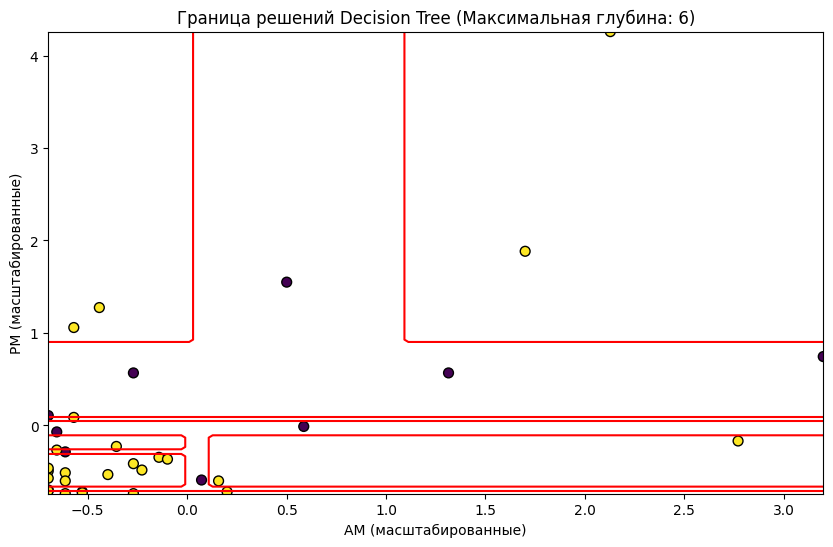

In [18]:
# Обучение лучшей модели Decision Tree
best_tree_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree_model.fit(X_scaled, y)

# Построение графика с масштабированными данными
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['am'], X_scaled['pm'], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title(f'Граница решений Decision Tree (Максимальная глубина: {best_depth})')
plt.xlabel('AM (масштабированные)')
plt.ylabel('PM (масштабированные)')

# Построение границы решений
xx, yy = np.meshgrid(np.linspace(X_scaled['am'].min(), X_scaled['am'].max(), 100),
                     np.linspace(X_scaled['pm'].min(), X_scaled['pm'].max(), 100))
Z = best_tree_model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['am', 'pm']))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.show()

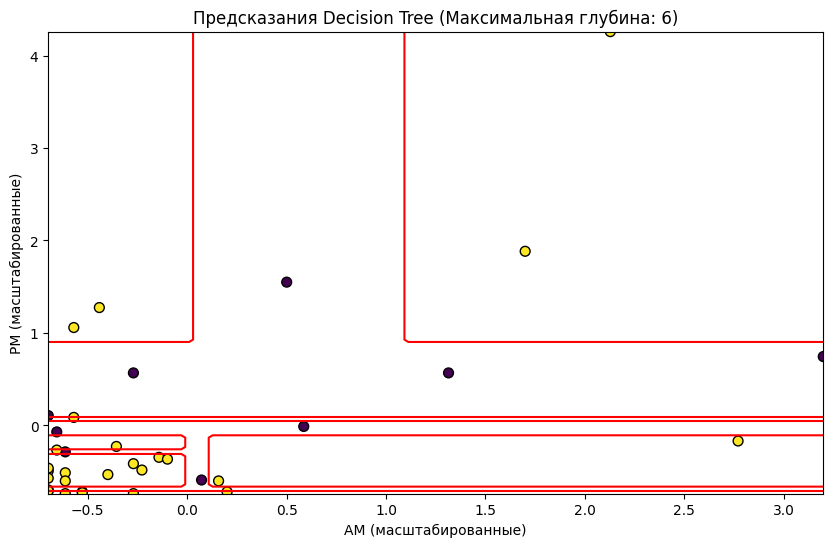

In [19]:
# Предсказание с использованием модели
y_pred_tree = best_tree_model.predict(X_scaled)

# Построение графика с предсказаниями
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled['am'], X_scaled['pm'], c=y_pred_tree, cmap='viridis', edgecolor='k', s=50)
plt.title(f'Предсказания Decision Tree (Максимальная глубина: {best_depth})')
plt.xlabel('AM (масштабированные)')
plt.ylabel('PM (масштабированные)')

# Построение границы решений
plt.contour(xx, yy, Z, levels=[0.5], colors='red')
plt.show()

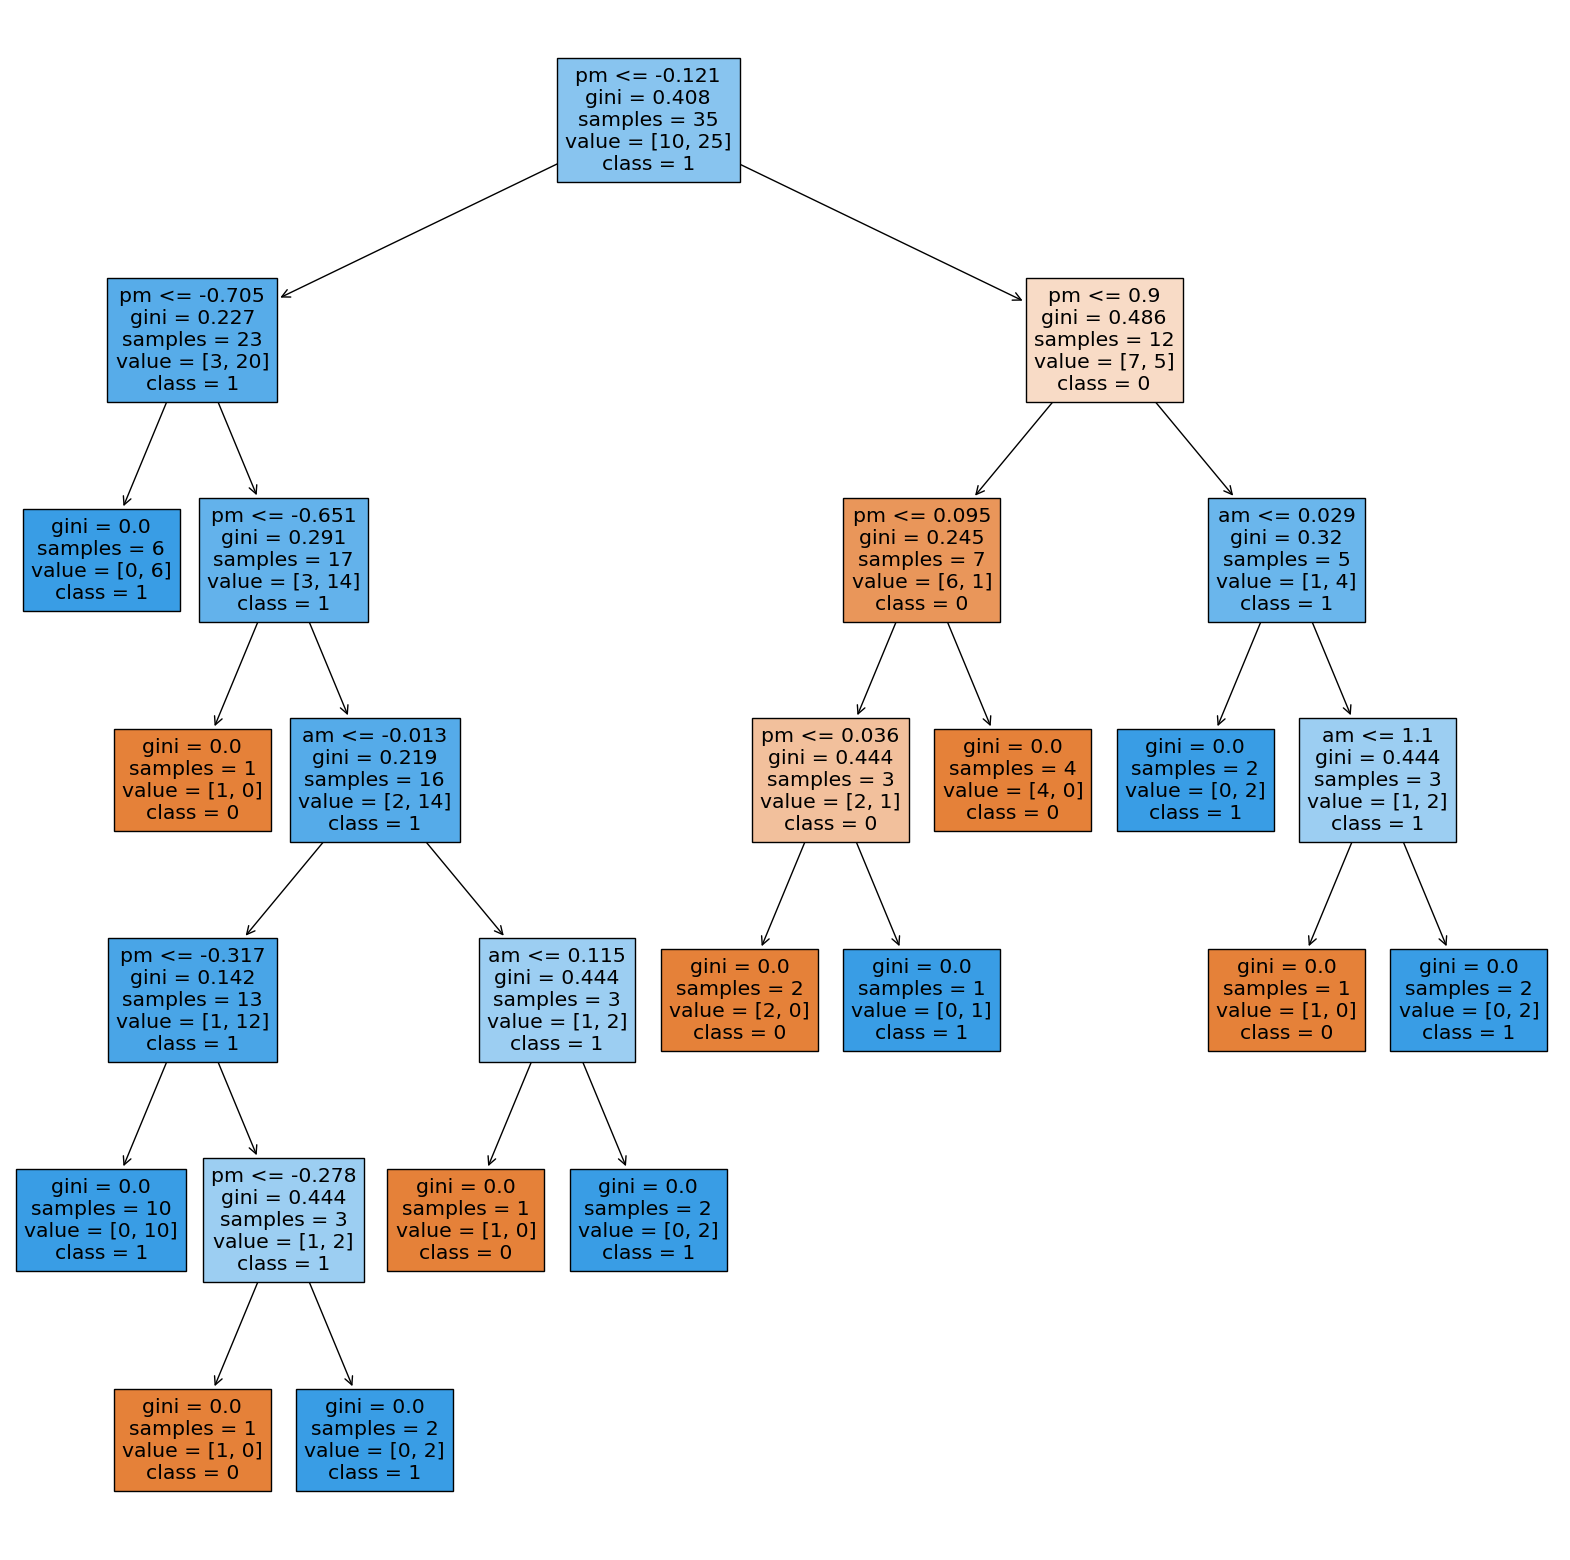

Количество листьев, классифицирующих дни как рабочие: 7


In [20]:
# Визуализация дерева решений
plt.figure(figsize=(20, 20))
plot_tree(best_tree_model, feature_names=['am', 'pm'], class_names=['0', '1'], filled=True)
plt.show()

# Подсчет количества листьев, которые классифицируют дни как рабочие
def is_leaf(tree, node_id):
    return tree.tree_.children_left[node_id] == -1 and tree.tree_.children_right[node_id] == -1

leaves = [i for i in range(best_tree_model.tree_.node_count) if is_leaf(best_tree_model, i)]
working_days_leaves = sum(best_tree_model.tree_.value[i][0][1] > best_tree_model.tree_.value[i][0][0] for i in leaves)
print(f'Количество листьев, классифицирующих дни как рабочие: {working_days_leaves}')